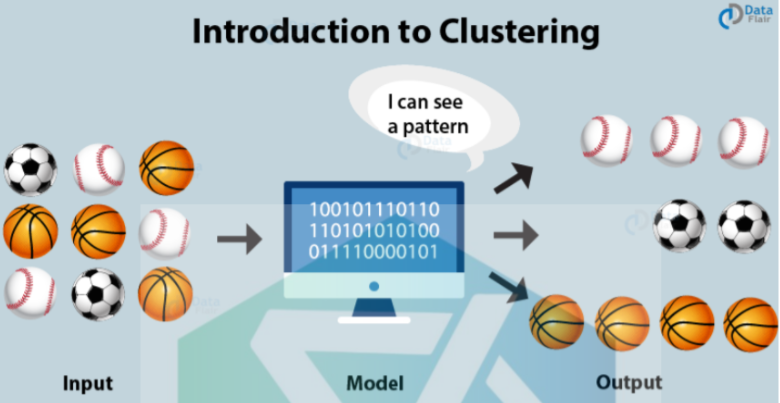

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.
Clustering is very much important as it determines the intrinsic grouping among the unlabeled data present. There are no criteria for a good clustering. It depends on the user, what is the criteria they may use which satisfy their need
Clustering techniques apply when there is no class to be predicted but rather when the instances are to be divided into natural groups.
 
**Various Clustering methods** 


*   Agglomerative Hierarchical Clustering
*   BIRCH
*   DBSCAN
*   K-Means
*   Mini-Batch K-Means
*   Mean Shift
*   OPTICS
*   Spectral Clustering
*   Gaussian Mixture Model




















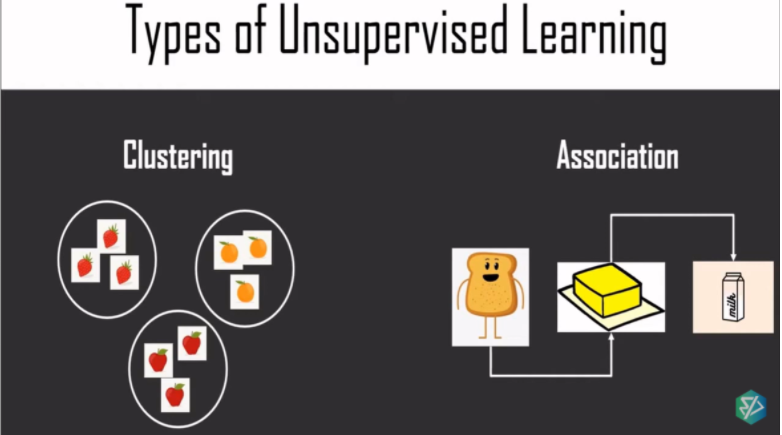

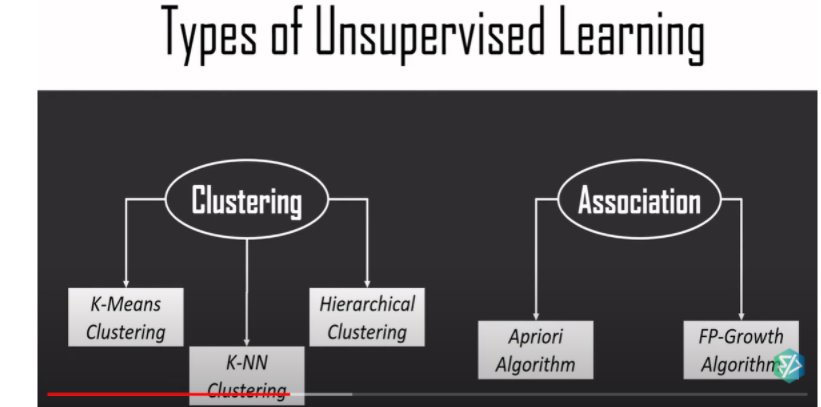

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.There are more than 100 clustering algorithms known.
 
**Types of Clustering**
Broadly speaking, clustering can be divided into two subgroups :


Hard Clustering: 
 
In hard clustering, each data point either belongs to a cluster completely or not.


 
Soft Clustering:

 
In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. 
 
 
Types of clustering algorithms


**Connectivity models:** 

As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lack scalability for handling big datasets. Examples of these models are hierarchical clustering algorithms and its variants.


**Centroid models:** 

These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.


**Distribution models:** 

These clustering models are based on the notion of how probable it is that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is the Expectation-maximization algorithm which uses multivariate normal distributions.


**Density Models:** 

These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assigns the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.


# **K Means Clustering**

K means is an iterative clustering algorithm that aims to find local maxima in each iteration.

Steps:

Specify the desired number of clusters K


Randomly assign each data point to a cluster : Let’s assign three points in cluster 1 shown using red color and two points in cluster 2 shown using grey color


Compute cluster centroids : The centroid of data points in the red cluster is shown using red cross and those in grey cluster using grey cross.


Re-assign each point to the closest cluster centroid : Note that only the data point at the bottom is assigned to the red cluster even though its closer to the centroid of the grey cluster. Thus, we assign that data point into grey cluster


Re-compute cluster centroids : Now, re-computing the centroids for both the clusters.


Repeat steps 4 and 5 until no improvements are possible





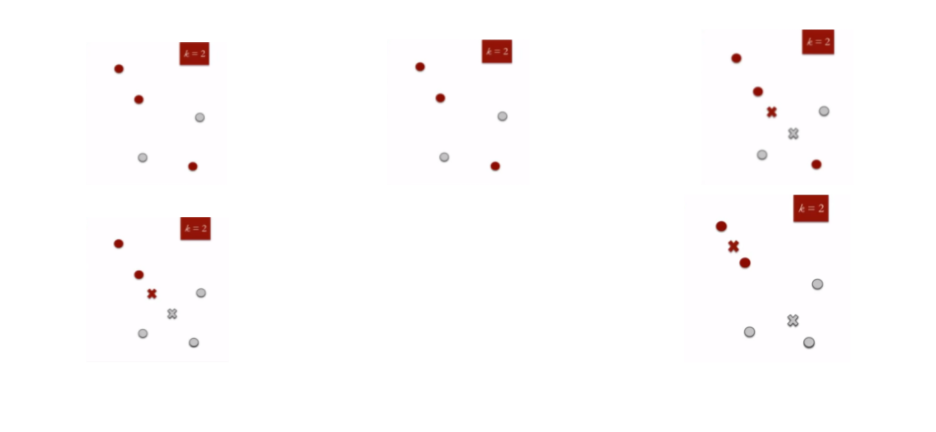

K-Means Clustering
K-Means is probably the most well-known clustering algorithm. 
To begin, we first select a number of classes/groups to use and randomly initialize their respective center points.
Each data point is classified by computing the distance between that point and each group center, and then classifying the point to be in the group whose center is closest to it.
Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.
Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations. You can also opt to randomly initialize the group centers a few times, and then select the run that looks like it provided the best results.
 
K-Means has the advantage that it’s pretty fast, as all we’re really doing is computing the distances between points and group centers; very few computations! It thus has a linear complexity O(n).
On the other hand, K-Means has a couple of disadvantages. Firstly, you have to select how many groups/classes there are. This isn’t always trivial and ideally with a clustering algorithm we’d want it to figure those out for us because the point of it is to gain some insight from the data. K-means also starts with a random choice of cluster centers and therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. Other cluster methods are more consistent.
K-Medians is another clustering algorithm related to K-Means, except instead of recomputing the group center points using the mean we use the median vector of the group. This method is less sensitive to outliers (because of using the Median) but is much slower for larger datasets as sorting is required on each iteration when computing the Median vector.


In [55]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
a=pd.get_dummies(data["Gender"],drop_first=True)
col2=a.columns
col1=data.columns

In [58]:
data=pd.concat([data,a],axis=1)
data.columns=col1.append(col2)
data=data.drop(["Gender"],axis=1)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [59]:
y=data["Male"]
data=data.drop(["Male"],axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [61]:
from sklearn.cluster import KMeans
 
model = KMeans(n_clusters=2) 
 
model.fit(X_train)
 
model.cluster_centers_


array([[150.08571429,  37.54285714,  81.74285714,  53.08571429],
       [ 46.421875  ,  40.34375   ,  37.828125  ,  49.        ]])

In [62]:
model.labels_

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0], dtype=int32)

In [63]:
list(y_train)

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [65]:
# Number of Clusters
print('\nDefault number of Clusters : ',model.n_clusters)
 
# # predict the clusters on the train dataset
predict_train = model.predict(data)
print('\nCLusters on train data',predict_train)
 
# # predict the target on the test dataset
predict_test = model.predict(X_test)
print('Clusters on test data',predict_test)
 
# # Now, we will train a model with n_cluster = 3
model_n3 = KMeans(n_clusters=3)
 
# # fit the model with the training data
model_n3.fit(X_train)
 
# # Number of Clusters
print('\nNumber of Clusters : ',model_n3.n_clusters)
 
# # predict the clusters on the train dataset
predict_train_3 = model_n3.predict(X_train)
print('\nCLusters on train data',predict_train_3)
 
# # predict the target on the test dataset
predict_test_3 = model_n3.predict(X_test)
print('Clusters on test data',predict_test_3)


Default number of Clusters :  2

CLusters on train data [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Clusters on test data [1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0]

Number of Clusters :  3

CLusters on train data [1 0 2 2 1 2 0 1 2 2 1 0 2 2 1 2 1 0 0 2 0 1 0 1 1 0 2 1 1 0 0 1 1 2 1 1 0
 0 2 0 1 1 2 0 0 1 0 0 2 2 1 1 0 1 1 2 0 0 1 1 0 0 2 1 0 1 2 0 1 2 1 2 1 2
 0 0 0 1 2 1 1 2 2 2 0 0 2 1 1 1 0 2 1 2 0 2 0 0 1 1 2 1 0 1 1 2 1 1 0 0 2
 1 0 0 1 1 0 2 0 2 2 2 2 2 2 0 1 0 2 2 1 2 0 2]
Clusters on test data [2 1 1 0 2 2 2 0 0 1 1 0 0 2 0 0 1 

# **Hierarchical Clustering**

Hierarchical clustering, as the name suggests, is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

The results of hierarchical clustering can be shown using dendrogram. 

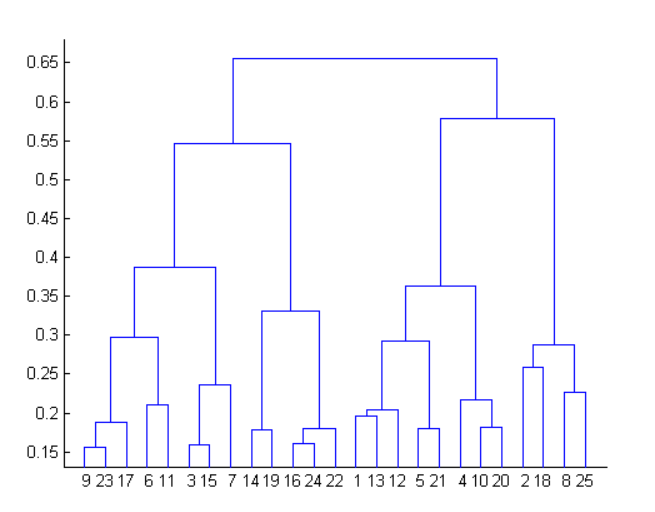


The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.
 
Two important things that you should know about hierarchical clustering are:
This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.
The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters :


Euclidean distance: ||a-b||2 = √(Σ(ai-bi))

Squared Euclidean distance: ||a-b||22 = Σ((ai-bi)2)

Manhattan distance: ||a-b||1 = Σ|ai-bi|

Maximum distance:||a-b||INFINITY = maxi|ai-bi|

Mahalanobis distance: √((a-b)T S-1 (-b))   {where, s : covariance matrix}


Agglomerative Hierarchical Clustering


Hierarchical clustering algorithms fall into 2 categories: top-down or bottom-up. Bottom-up algorithms treat each data point as a single cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all data points. Bottom-up hierarchical clustering is therefore called hierarchical agglomerative clustering or HAC. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. Check out the graphic below for an illustration before moving on to the algorithm steps
We begin by treating each data point as a single cluster i.e if there are X data points in our dataset then we have X clusters. We then select a distance metric that measures the distance between two clusters. As an example, we will use average linkage which defines the distance between two clusters to be the average distance between data points in the first cluster and data points in the second cluster.
On each iteration, we combine two clusters into one. The two clusters to be combined are selected as those with the smallest average linkage. I.e according to our selected distance metric, these two clusters have the smallest distance between each other and therefore are the most similar and should be combined.
Step 2 is repeated until we reach the root of the tree i.e we only have one cluster which contains all data points. In this way we can select how many clusters we want in the end, simply by choosing when to stop combining the clusters i.e when we stop building the tree!
Hierarchical clustering does not require us to specify the number of clusters and we can even select which number of clusters looks best since we are building a tree. Additionally, the algorithm is not sensitive to the choice of distance metric; all of them tend to work equally well whereas with other clustering algorithms, the choice of distance metric is critical. A particularly good use case of hierarchical clustering methods is when the underlying data has a hierarchical structure and you want to recover the hierarchy; other clustering algorithms can’t do this. These advantages of hierarchical clustering come at the cost of lower efficiency, as it has a time complexity of O(n³), unlike the linear complexity of K-Means and GMM.

# **Mean-Shift Clustering**

It is a centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window. These candidate windows are then filtered in a post-processing stage to eliminate near-duplicates, forming the final set of center points and their corresponding groups.

To explain mean-shift we will consider a set of points in two-dimensional space like the above illustration. We begin with a circular sliding window centered at a point C (randomly selected) and having radius r as the kernel. Mean shift is a hill-climbing algorithm that involves shifting this kernel iteratively to a higher density region on each step until convergence.
At every iteration, the sliding window is shifted towards regions of higher density by shifting the center point to the mean of the points within the window (hence the name). The density within the sliding window is proportional to the number of points inside it. Naturally, by shifting to the mean of the points in the window it will gradually move towards areas of higher point density.
We continue shifting the sliding window according to the mean until there is no direction at which a shift can accommodate more points inside the kernel. Check out the graphic above; we keep moving the circle until we no longer are increasing the density (i.e number of points in the window).
This process of steps 1 to 3 is done with many sliding windows until all points lie within a window. When multiple sliding windows overlap the window containing the most points is preserved. The data points are then clustered according to the sliding window in which they reside.

In contrast to K-means clustering, there is no need to select the number of clusters as mean-shift automatically discovers this. That’s a massive advantage. The fact that the cluster centers converge towards the points of maximum density is also quite desirable as it is quite intuitive to understand and fits well in a naturally data-driven sense. The drawback is that the selection of the window size/radius “r” can be non-trivial.


# **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

DBSCAN is a density-based clustered algorithm similar to mean-shift, but with a couple of notable advantages.
 
DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a distance epsilon ε (All points which are within the ε distance are neighborhood points).


If there are a sufficient number of points (according to minPoints) within this neighborhood then the clustering process starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as noise (later this noisy point might become the part of the cluster). In both cases that point is marked as “visited”.


For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.
This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e all points within the ε neighborhood of the cluster have been visited and labeled.


Once we’re done with the current cluster, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

This process repeats until all points are marked as visited. Since at the end of this all points have been visited, each point will have been marked as either belonging to a cluster or being noisy.


DBSCAN poses some great advantages over other clustering algorithms. Firstly, it does not require a pe-set number of clusters at all. It also identifies outliers as noises, unlike mean-shift which simply throws them into a cluster even if the data point is very different. Additionally, it can find arbitrarily sized and arbitrarily shaped clusters quite well.


The main drawback of DBSCAN is that it doesn’t perform as well as others when the clusters are of varying density. This is because the setting of the distance threshold ε and minPoints for identifying the neighborhood points will vary from cluster to cluster when the density varies. This drawback also occurs with very high-dimensional data since again the distance threshold ε becomes challenging to estimate.


**Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)**

One of the major drawbacks of K-Means is its naive use of the mean value for the cluster center. We can see why this isn’t the best way of doing things by looking at the image below. On the left-hand side, it looks quite obvious to the human eye that there are two circular clusters with different radius’ centered at the same mean. K-Means can’t handle this because the mean values of the clusters are very close together. K-Means also fails in cases where the clusters are not circular, again as a result of using the mean as cluster center.
 
Gaussian Mixture Models (GMMs) give us more flexibility than K-Means. With GMMs we assume that the data points are Gaussian distributed; this is a less restrictive assumption than saying they are circular by using the mean. That way, we have two parameters to describe the shape of the clusters: the mean and the standard deviation! Taking an example in two dimensions, this means that the clusters can take any kind of elliptical shape (since we have a standard deviation in both the x and y directions). Thus, each Gaussian distribution is assigned to a single cluster.
To find the parameters of the Gaussian for each cluster (e.g the mean and standard deviation), we will use an optimization algorithm called Expectation–Maximization (EM). Take a look at the graphic below as an illustration of the Gaussians being fitted to the clusters. Then we can proceed with the process of Expectation–Maximization clustering using GMMs.
We begin by selecting the number of clusters (like K-Means does) and randomly initializing the Gaussian distribution parameters for each cluster. One can try to provide a good estimate for the initial parameters by taking a quick look at the data too. Though note, as can be seen in the graphic above, this isn’t 100% necessary as the Gaussians start out as very poor but are quickly optimized.
Given these Gaussian distributions for each cluster, compute the probability that each data point belongs to a particular cluster. The closer a point is to the Gaussian’s center, the more likely it belongs to that cluster. This should make intuitive sense since with a Gaussian distribution we are assuming that most of the data lies closer to the center of the cluster.
Based on these probabilities, we compute a new set of parameters for the Gaussian distributions such that we maximize the probabilities of data points within the clusters. We compute these new parameters using a weighted sum of the data point positions, where the weights are the probabilities of the data point belonging in that particular cluster. To explain this visually we can take a look at the graphic above, in particular the yellow cluster as an example. The distribution starts off randomly on the first iteration, but we can see that most of the yellow points are to the right of that distribution. When we compute a sum weighted by the probabilities, even though there are some points near the center, most of them are on the right. Thus naturally the distribution’s mean is shifted closer to those set of points. We can also see that most of the points are “top-right to bottom-left”. Therefore the standard deviation changes to create an ellipse that is more fitted to these points, to maximize the sum weighted by the probabilities.
Steps 2 and 3 are repeated iteratively until convergence, where the distributions don’t change much from iteration to iteration.
There are 2 key advantages to using GMMs. Firstly GMMs are a lot more flexible in terms of cluster covariance than K-Means; due to the standard deviation parameter, the clusters can take on any ellipse shape, rather than being restricted to circles. K-Means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. Secondly, since GMMs use probabilities, they can have multiple clusters per data point. So if a data point is in the middle of two overlapping clusters, we can simply define its class by saying it belongs X-percent to class 1 and Y-percent to class 2. I.e GMMs support mixed membership.
